## Word-level One hot encoding

In [1]:
import numpy as np

In [3]:
samples  = ['The cat sat on the mat.','The dog ate my homework.']

In [4]:
token_index = {}

In [5]:
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [6]:
max_length = 10

In [7]:
results = np.zeros(shape = (len(samples),
                           max_length,
                           max(token_index.values()) + 1))

In [8]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [11]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## Character Level one hot encoding

In [12]:
import string

In [13]:
characters = string.printable

In [14]:
token_index = dict(zip(range(1, len(characters)+1), characters))

In [15]:
max_length = 50

In [16]:
results = np.zeros((len(samples), max_length, max(token_index.keys())+ 1))

In [17]:
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

In [19]:
print(results.shape)

(2, 50, 101)


## Keras based word level one hot encoding

In [20]:
from keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

In [22]:
sequences = tokenizer.texts_to_sequences(samples)

In [24]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [25]:
word_index = tokenizer.word_index

In [26]:
print("Found %s unique tokens."%len(word_index))

Found 9 unique tokens.


In [27]:
print(one_hot_results)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Hashing Trick

In [28]:
dimensionality = 1000
max_length = 10

In [29]:
results = np.zeros((len(samples), max_length, dimensionality))

In [30]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1

In [31]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


## IMDB Dataset

In [32]:
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing

In [33]:
max_features = 10000
maxlen = 20

In [35]:
(x_train, y_train) , (x_test, y_test) = imdb.load_data(num_words=max_features)

In [36]:
x_train = preprocessing.sequence.data_utils.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.data_utils.pad_sequences(x_test, maxlen=maxlen)

In [37]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [38]:
model = Sequential()

In [39]:
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 6ms/step - loss: 0.6665 - acc: 0.6265 - val_loss: 0.6095 - val_acc: 0.6990
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5338 - acc: 0.7555 - val_loss: 0.5210 - val_acc: 0.7276
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4578 - acc: 0.7899 - val_loss: 0.4975 - val_acc: 0.7476
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4210 - acc: 0.8096 - val_loss: 0.4939 - val_acc: 0.7496
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3952 - acc: 0.8234 - val_loss: 0.4958 - val_acc: 0.7552
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3747 - acc: 0.8355 - val_loss: 0.4983 - val_acc: 0.7578
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3566 - acc: 0.8462 - val_loss: 0.5053 - val_acc: 0.7556
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

In [42]:
loss, accuracy = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5132 - acc: 0.7598


In [43]:
print("Accuracy : {:.2f}".format(accuracy))

Accuracy : 0.76


## Word Embeddings in Keras

In [44]:
import os

In [45]:
imdb_dir = r"D:\DL_Keras_Book\aclImdb\aclImdb"

In [46]:
train_dir = os.path.join(imdb_dir, 'test')

In [49]:
labels = []
texts = []

In [50]:
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == ".txt":
            f = open(os.path.join(dir_name, fname),encoding = 'utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [53]:
maxlen = 100
training_samples = 200
validation_samples = 100000
max_words = 10000

In [54]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

In [55]:
sequences = tokenizer.texts_to_sequences(texts)

In [56]:
word_index = tokenizer.word_index
print("Found {} unique tokens".format(len(word_index)))

Found 72633 unique tokens


In [57]:
data = preprocessing.sequence.data_utils.pad_sequences(sequences, maxlen=maxlen)

In [58]:
labels = np.asarray(labels)

In [59]:
print("Shape of data tensor : ", data.shape)
print("Shape of label tensor : ", labels.shape)

Shape of data tensor :  (17243, 100)
Shape of label tensor :  (17243,)


In [60]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [61]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

In [62]:
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [63]:
glove_dir = r"D:/DL_Keras_Book/glove.6B/"

In [64]:
embeddings_index = {}

In [67]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding='utf-8')

In [68]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [69]:
print("Found {} word vectors.".format(len(embeddings_index)))

Found 400004 word vectors.


In [70]:
embedding_dim = 100

In [71]:
embedding_matrix = np.zeros((max_words, embedding_dim))

In [72]:
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [73]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [75]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [76]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 149ms/step - loss: 1.0009 - acc: 0.7400 - val_loss: 0.6191 - val_acc: 0.7243
Epoch 2/10
7/7 [==============================] - 1s 119ms/step - loss: 0.4372 - acc: 0.8150 - val_loss: 0.6142 - val_acc: 0.7189
Epoch 3/10
7/7 [==============================] - 1s 120ms/step - loss: 0.3845 - acc: 0.8800 - val_loss: 1.1024 - val_acc: 0.7243
Epoch 4/10
7/7 [==============================] - 1s 117ms/step - loss: 0.2198 - acc: 0.9150 - val_loss: 0.6297 - val_acc: 0.7201
Epoch 5/10
7/7 [==============================] - 1s 120ms/step - loss: 0.1429 - acc: 0.9650 - val_loss: 0.9193 - val_acc: 0.7243
Epoch 6/10
7/7 [==============================] - 1s 119ms/step - loss: 0.0679 - acc: 0.9950 - val_loss: 0.9390 - val_acc: 0.7237
Epoch 7/10
7/7 [==============================] - 1s 119ms/step - loss: 0.0427 - acc: 1.0000 - val_loss: 0.9839 - val_acc: 0.7242
Epoch 8/10
7/7 [==============================] - 1s 136ms/step - loss: 0.0227 - acc: 1.00

In [77]:
model.save_weights('pre_trained_glove_model.h5')

In [78]:
import matplotlib.pyplot as plt

In [79]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [80]:
epochs = range(1, len(acc)+1)

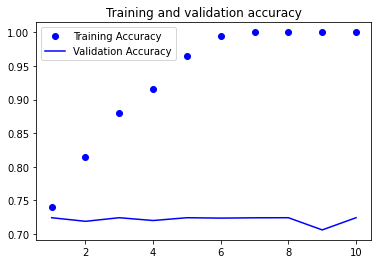

In [81]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

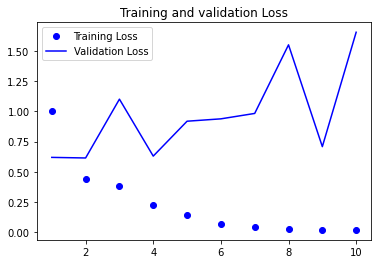

In [82]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and validation Loss")
plt.legend()

In [83]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [86]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 157ms/step - loss: 0.6285 - acc: 0.7750 - val_loss: 0.5919 - val_acc: 0.7243
Epoch 2/10
7/7 [==============================] - 1s 127ms/step - loss: 0.3146 - acc: 0.8350 - val_loss: 0.5978 - val_acc: 0.7091
Epoch 3/10
7/7 [==============================] - 1s 126ms/step - loss: 0.1687 - acc: 0.9800 - val_loss: 0.5952 - val_acc: 0.7236
Epoch 4/10
7/7 [==============================] - 1s 129ms/step - loss: 0.0843 - acc: 1.0000 - val_loss: 0.6708 - val_acc: 0.7243
Epoch 5/10
7/7 [==============================] - 1s 126ms/step - loss: 0.0461 - acc: 1.0000 - val_loss: 0.6472 - val_acc: 0.7215
Epoch 6/10
7/7 [==============================] - 1s 132ms/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.7120 - val_acc: 0.7242
Epoch 7/10
7/7 [==============================] - 1s 128ms/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.7255 - val_acc: 0.7242
Epoch 8/10
7/7 [==============================] - 1s 127ms/step - loss: 0.0086 - acc: 1.00

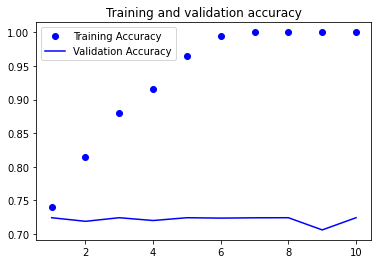

In [87]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

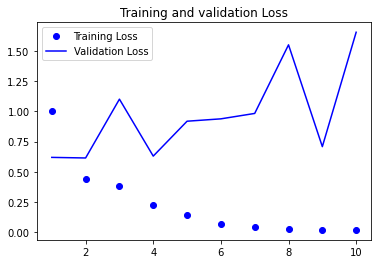

In [88]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and validation Loss")
plt.legend()